In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [91]:
data =  pd.read_csv("/content/drive/MyDrive/Dataset/marketing_campaign.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


| Kolom                 | Deskripsi                                                                   |
| --------------------- | --------------------------------------------------------------------------- |
| `ID`                  | ID unik untuk setiap pelanggan                                              |
| `Year_Birth`          | Tahun kelahiran pelanggan                                                   |
| `Education`           | Tingkat pendidikan (`Graduation`, `PhD`, dll)                               |
| `Marital_Status`      | Status pernikahan (`Single`, `Married`, `Together`, dll)                    |
| `Income`              | Pendapatan tahunan pelanggan (dalam mata uang lokal)                        |
| `Kidhome`             | Jumlah anak kecil di rumah                                                  |
| `Teenhome`            | Jumlah remaja di rumah                                                      |
| `Dt_Customer`         | Tanggal pertama kali menjadi pelanggan                                      |
| `Recency`             | Hari sejak terakhir kali melakukan pembelian (semakin kecil = semakin baru) |
| `MntWines`            | Total pengeluaran untuk produk wine                                         |
| `MntFruits`           | Total pengeluaran untuk buah-buahan                                         |
| `MntMeatProducts`     | Total pengeluaran untuk daging                                              |
| `MntFishProducts`     | Total pengeluaran untuk ikan                                                |
| `MntSweetProducts`    | Total pengeluaran untuk makanan manis                                       |
| `MntGoldProds`        | Total pengeluaran untuk produk emas                                         |
| `NumDealsPurchases`   | Jumlah pembelian dengan diskon                                              |
| `NumWebPurchases`     | Jumlah pembelian melalui web                                                |
| `NumCatalogPurchases` | Jumlah pembelian melalui katalog                                            |
| `NumStorePurchases`   | Jumlah pembelian langsung di toko                                           |
| `NumWebVisitsMonth`   | Jumlah kunjungan ke website dalam sebulan terakhir                          |
| `AcceptedCmp1–5`      | Indikator apakah pelanggan menerima kampanye pemasaran ke-1 hingga ke-5     |
| `Complain`            | Apakah pelanggan pernah mengajukan komplain (1 = ya, 0 = tidak)             |
| `Z_CostContact`       | Nilai tetap biaya kontak (semua bernilai 3, tidak informatif)               |
| `Z_Revenue`           | Nilai tetap pendapatan perusahaan dari pelanggan (semua bernilai 11)        |
| `Response`            | Apakah pelanggan menerima kampanye terakhir (1 = ya, 0 = tidak)             |


# **Exploratory Data Analysis (EDA)**

## **Melihat Informasi Dataset**

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **Melihat Apakah Ada Data yang Kosong**

In [93]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [94]:
# Menghapus data yang kosong
data_clean = data.dropna(subset=['Income']).copy()
data_clean.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


# **Visualisasi Data**

## **1. Distribusi Pendapatan (Income)**

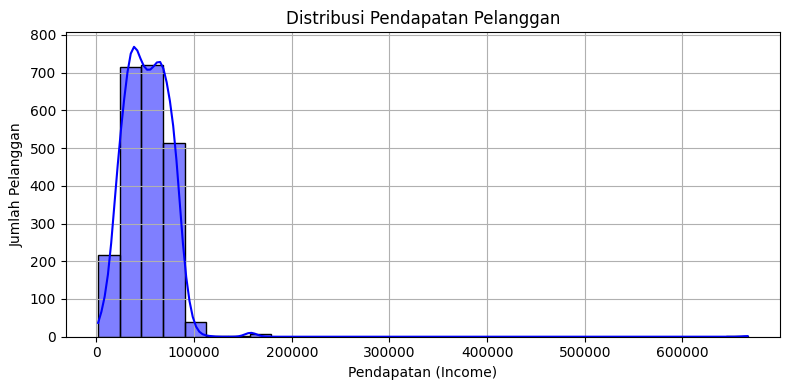

In [95]:
plt.figure(figsize=(8, 4))
sns.histplot(data_clean['Income'], bins=30, kde=True, color='blue')
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan (Income)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.tight_layout()
plt.show()

## **2. Distribusi Total Pengeluaran (TotalSpend)**

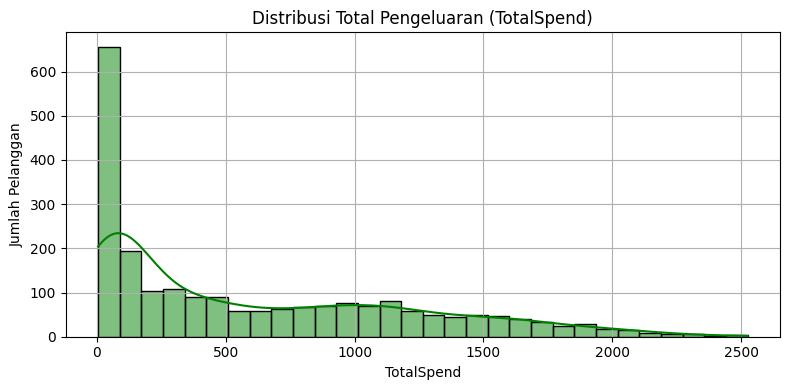

In [96]:
data_clean['TotalSpend'] = data_clean[['MntWines', 'MntFruits', 'MntMeatProducts',
                                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

plt.figure(figsize=(8, 4))
sns.histplot(data_clean['TotalSpend'], bins=30, kde=True, color='green')
plt.title('Distribusi Total Pengeluaran (TotalSpend)')
plt.xlabel('TotalSpend')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.tight_layout()
plt.show()

## **3. Boxplot Pendapatan Berdasarkan Pendidikan**

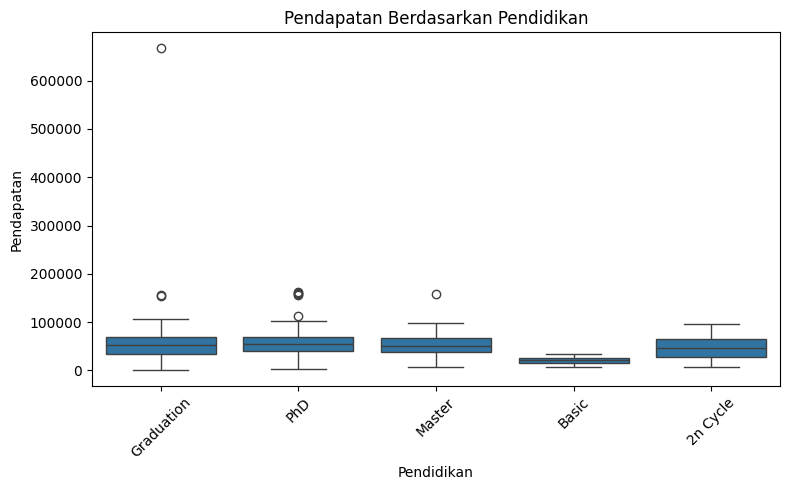

In [97]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='Income', data=data_clean)
plt.title('Pendapatan Berdasarkan Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Pendapatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **4. Jumlah Pelanggan Berdasarkan Status Pernikahan**

/tmp/ipython-input-98-610484206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='colorblind')


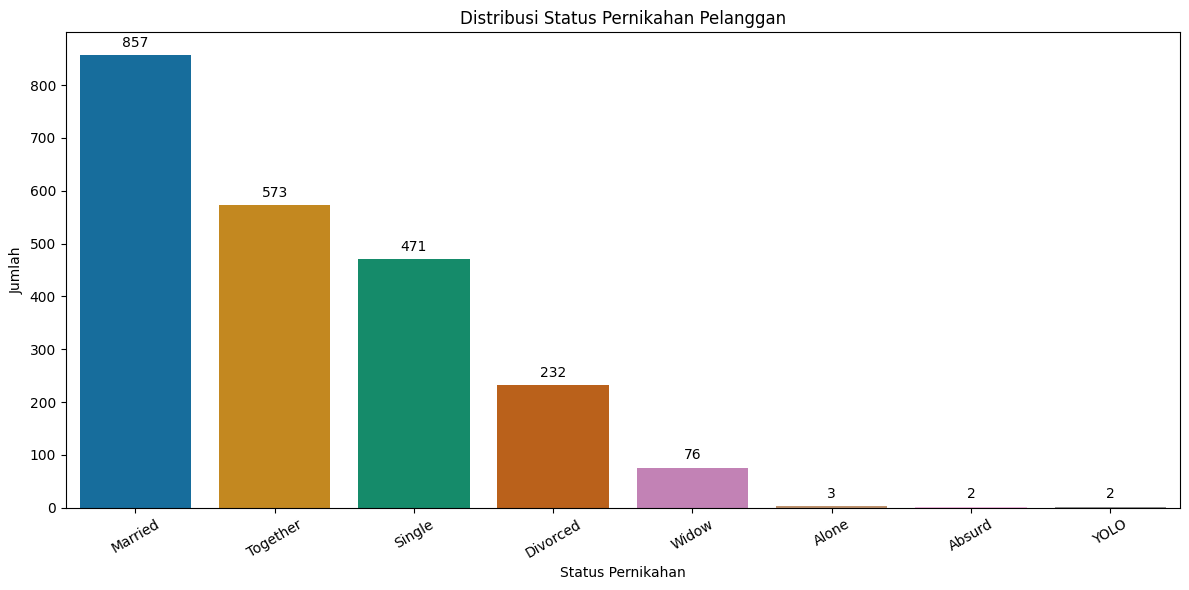

In [98]:
# Hitung jumlah masing-masing status pernikahan
status_counts = data_clean['Marital_Status'].value_counts()

# Buat figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='colorblind')

# Tambahkan label jumlah di atas tiap batang
for i, value in enumerate(status_counts.values):
    ax.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Status Pernikahan Pelanggan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## **5. Jumlah Pengeluaran Tiap Kategori Produk**

/tmp/ipython-input-99-3849024733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_by_category.index, y=total_by_category.values, palette='colorblind')


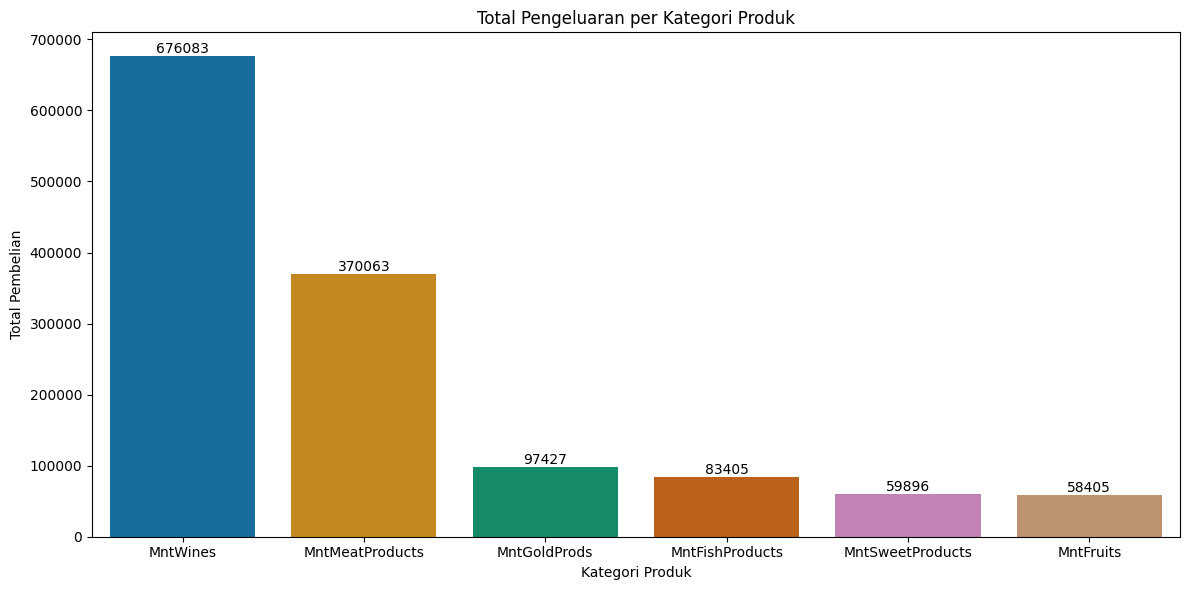

In [99]:
# Daftar kolom produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Hitung total pembelian per kategori produk
total_by_category = data_clean[product_columns].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_by_category.index, y=total_by_category.values, palette='colorblind')

# Tambahkan label angka di atas setiap batang
for i, value in enumerate(total_by_category.values):
    ax.text(i, value + 10, f'{int(value)}', ha='center', va='bottom', fontsize=10)

plt.title('Total Pengeluaran per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pembelian')
plt.tight_layout()
plt.show()

## **6. Distribusi Respon terhadap Kampanye**

/tmp/ipython-input-112-3488028100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Response', data=data_clean, palette='colorblind')


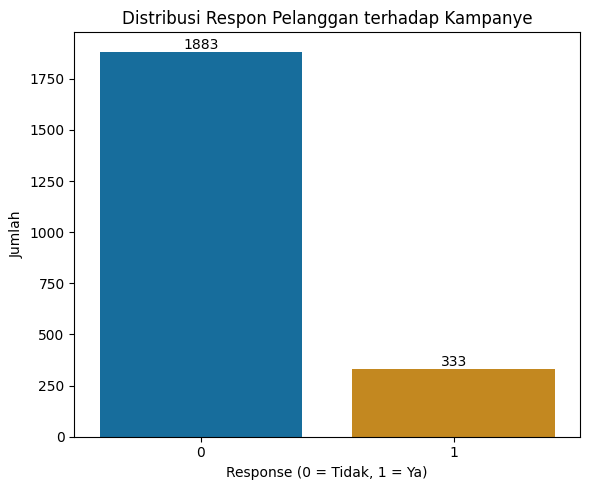

In [112]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Response', data=data_clean, palette='colorblind')

# Tambahkan label jumlah di atas setiap batang
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',               # teks label
                (p.get_x() + p.get_width() / 2., count),  # posisi (tengah atas bar)
                ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Respon Pelanggan terhadap Kampanye')
plt.xlabel('Response (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

## **7. Heatmap Korelasi Antar Variabel Numerik**

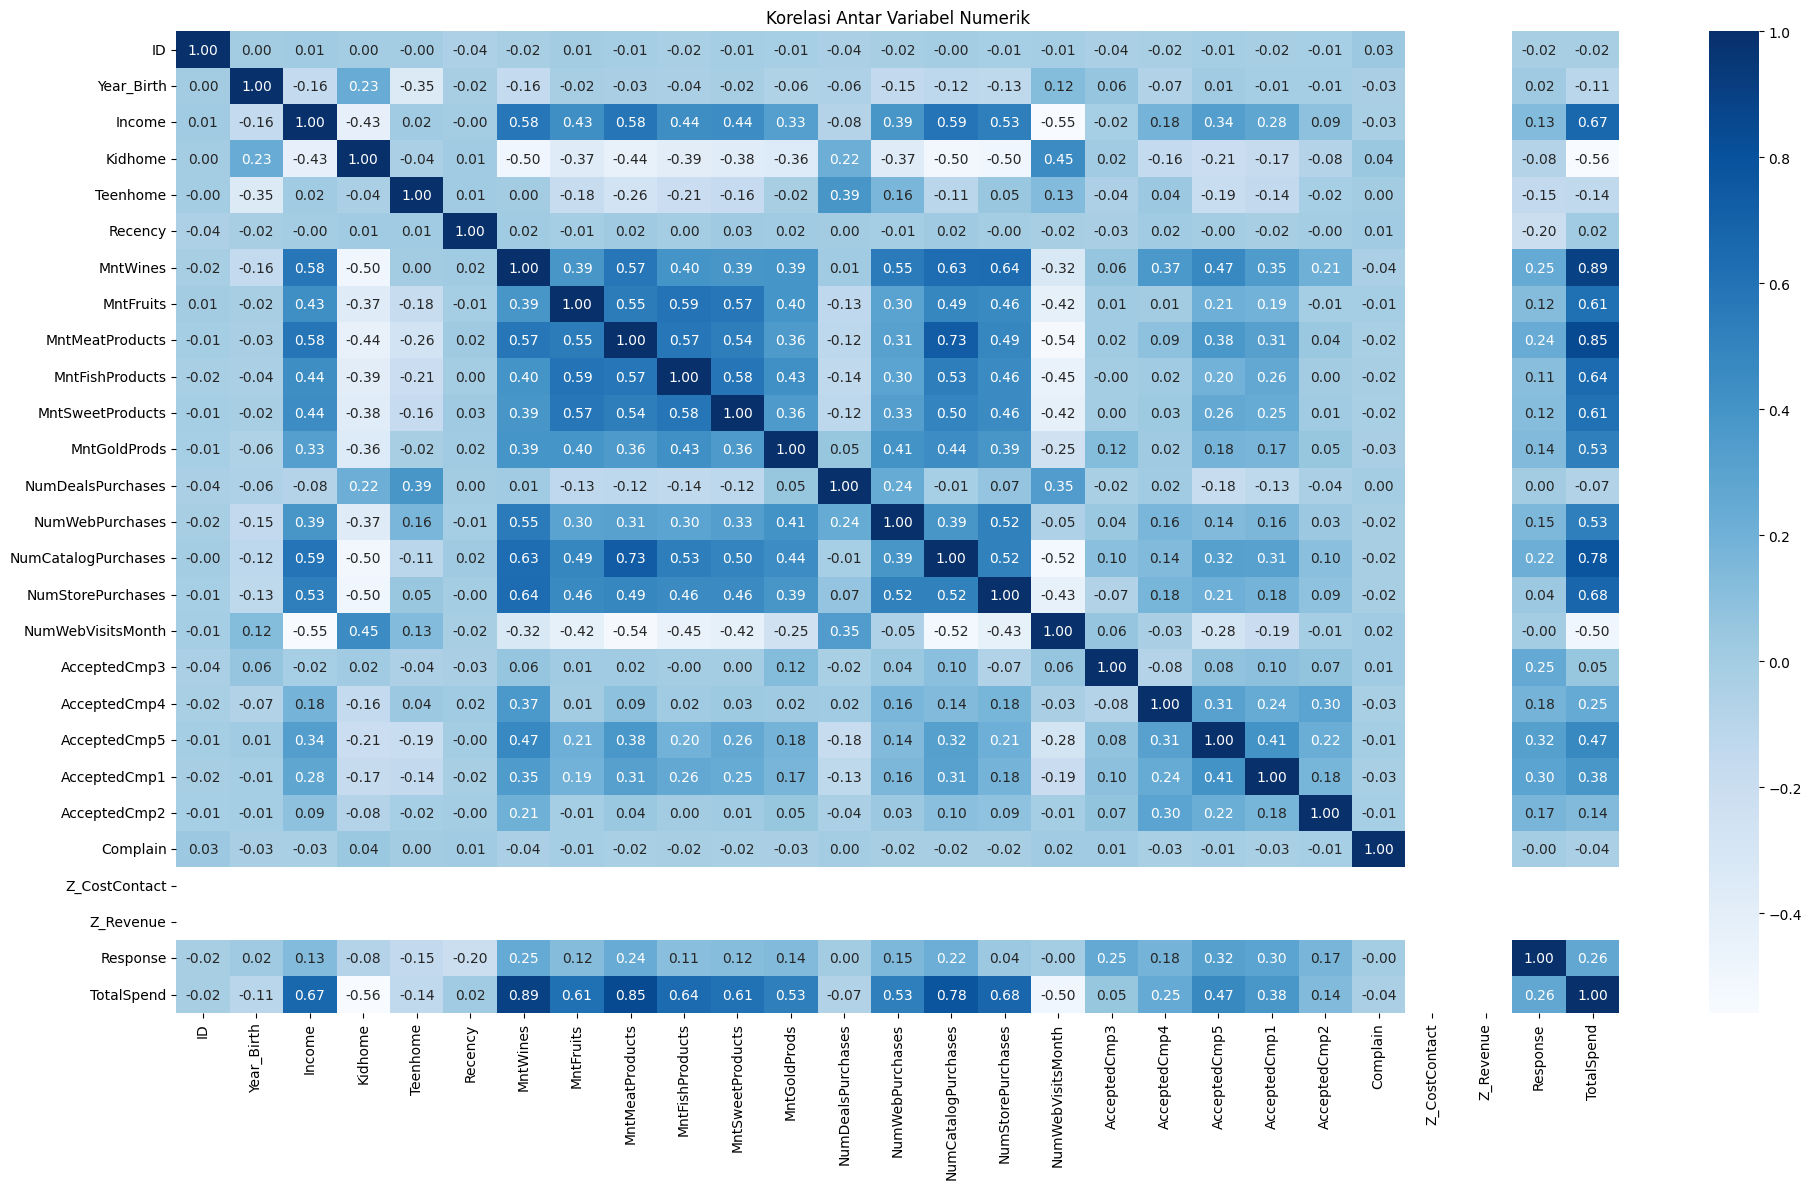

In [110]:
plt.figure(figsize=(20, 12))
sns.heatmap(data_clean.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.tight_layout()
plt.show()

## **Statistik Deskriptif**

In [102]:
data_clean.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpend
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,607.075361
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,602.900476
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000


# **Feature Engineering**

In [123]:
# Total pengeluaran sebagai CLV (proxy)
data_clean['TotalSpend'] = data_clean[['MntWines', 'MntFruits', 'MntMeatProducts',
                                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Jumlah anak
data_clean['TotalChildren'] = data_clean['Kidhome'] + data_clean['Teenhome']

# ===== DEFINISI FITUR DAN TARGET =====
features = ['Income', 'Education', 'Marital_Status', 'Recency',
            'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases',
            'NumDealsPurchases', 'NumWebVisitsMonth', 'TotalChildren']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_clean['Education'] = le.fit_transform(data_clean['Education'])
data_clean['Marital_Status'] = le.fit_transform(data_clean['Marital_Status'])

X = data_clean[features]
y = data_clean['TotalSpend']  # Target: total pengeluaran pelanggan

# **MODEL REGRESI CLV**

In [147]:
# === 4. SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

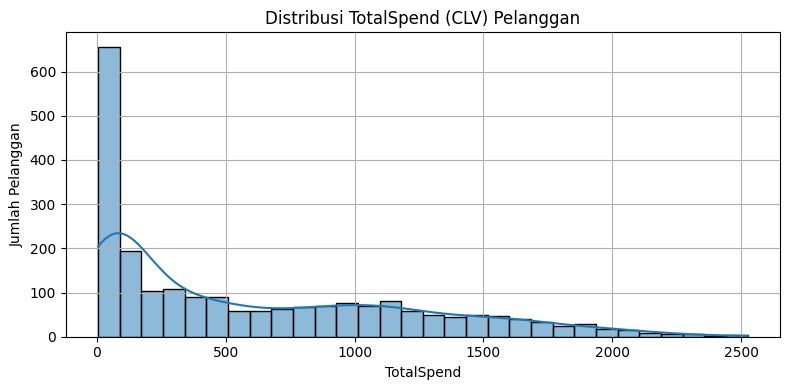

In [148]:
# ===== VISUALISASI =====

# Distribusi Total CLV aktual
plt.figure(figsize=(8, 4))
sns.histplot(data_clean['TotalSpend'], bins=30, kde=True)
plt.title('Distribusi TotalSpend (CLV) Pelanggan')
plt.xlabel('TotalSpend')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.tight_layout()
plt.show()

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'LinearRegression': LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'RandomForest': RandomForestRegressor(random_state=42)
}


# Simpan hasil evaluasi ke dictionary
results = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'R2': []
}

# === LATIH & EVALUASI + SIMPAN HASIL ===
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE  : {mae:.2f}")
    print(f"R²   : {r2:.2f}")

    # Simpan hasil evaluasi ke dalam list
    results['Model'].append(name)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

# Convert ke DataFrame
import pandas as pd
results_df = pd.DataFrame(results)


=== LinearRegression ===
RMSE : 319.06
MAE  : 206.77
R²   : 0.75

=== GradientBoosting ===
RMSE : 219.29
MAE  : 127.79
R²   : 0.88

=== XGBoost ===
RMSE : 218.72
MAE  : 108.23
R²   : 0.88

=== RandomForest ===
RMSE : 212.17
MAE  : 112.47
R²   : 0.89


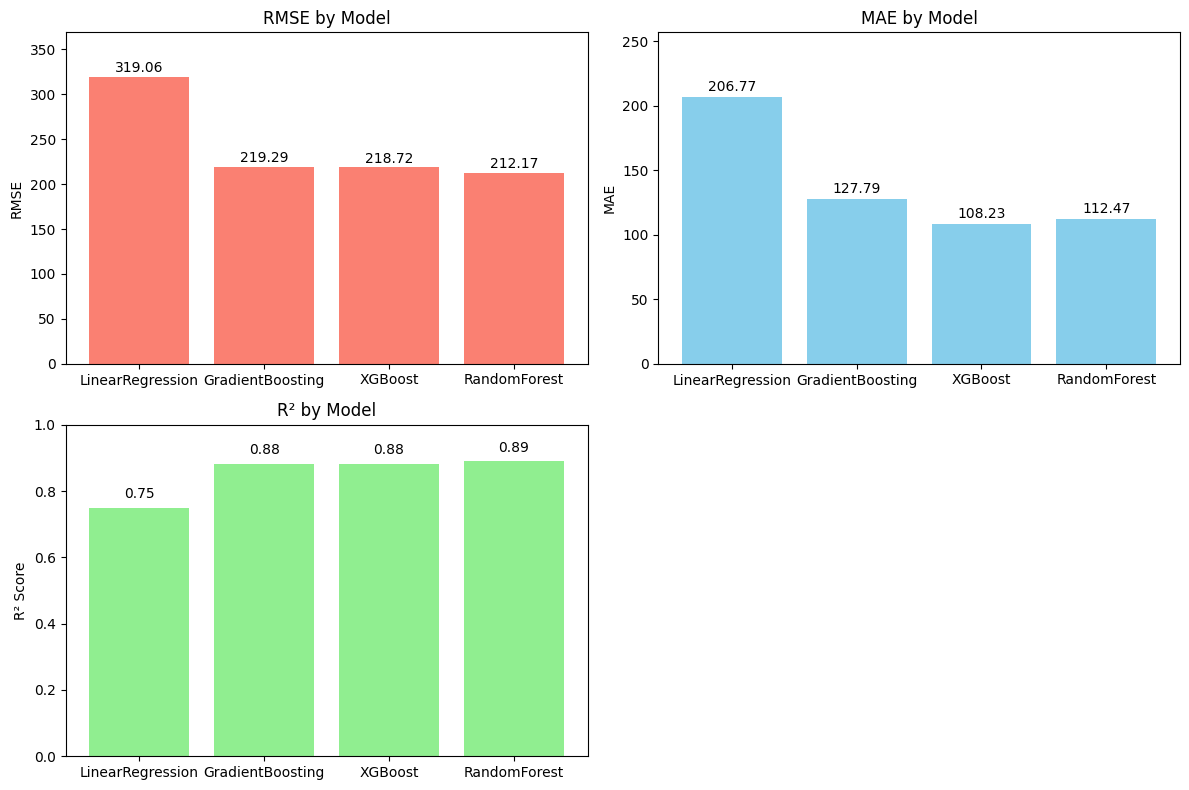

In [149]:
plt.figure(figsize=(12, 8))

# RMSE
plt.subplot(2, 2, 1)
bars = plt.bar(results_df['Model'], results_df['RMSE'], color='salmon')
plt.title('RMSE by Model')
plt.ylabel('RMSE')
plt.ylim(0, results_df['RMSE'].max() + 50)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f"{bar.get_height():.2f}", ha='center', va='bottom')

# MAE
plt.subplot(2, 2, 2)
bars = plt.bar(results_df['Model'], results_df['MAE'], color='skyblue')
plt.title('MAE by Model')
plt.ylabel('MAE')
plt.ylim(0, results_df['MAE'].max() + 50)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f"{bar.get_height():.2f}", ha='center', va='bottom')

# R²
plt.subplot(2, 2, 3)
bars = plt.bar(results_df['Model'], results_df['R2'], color='lightgreen')
plt.title('R² by Model')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{bar.get_height():.2f}", ha='center', va='bottom')

# Kosongkan subplot ke-4
plt.subplot(2, 2, 4)
plt.axis('off')

plt.tight_layout()
plt.show()

| Model                | Akurasi Terbaik (R²) | Kesalahan Terkecil (RMSE / MAE) |
| -------------------- | -------------------- | ------------------------------- |
| **RandomForest**     | ✅ Terbaik (0.89)     | ✅ RMSE dan MAE sangat kecil     |
| **XGBoost**          | Sangat baik (0.88)   | ✅ MAE paling kecil              |
| **GradientBoosting** | Baik (0.88)          | Juga cukup akurat               |
| **LinearRegression** | ❌ Terburuk (0.75)    | ❌ Kesalahan paling besar        |


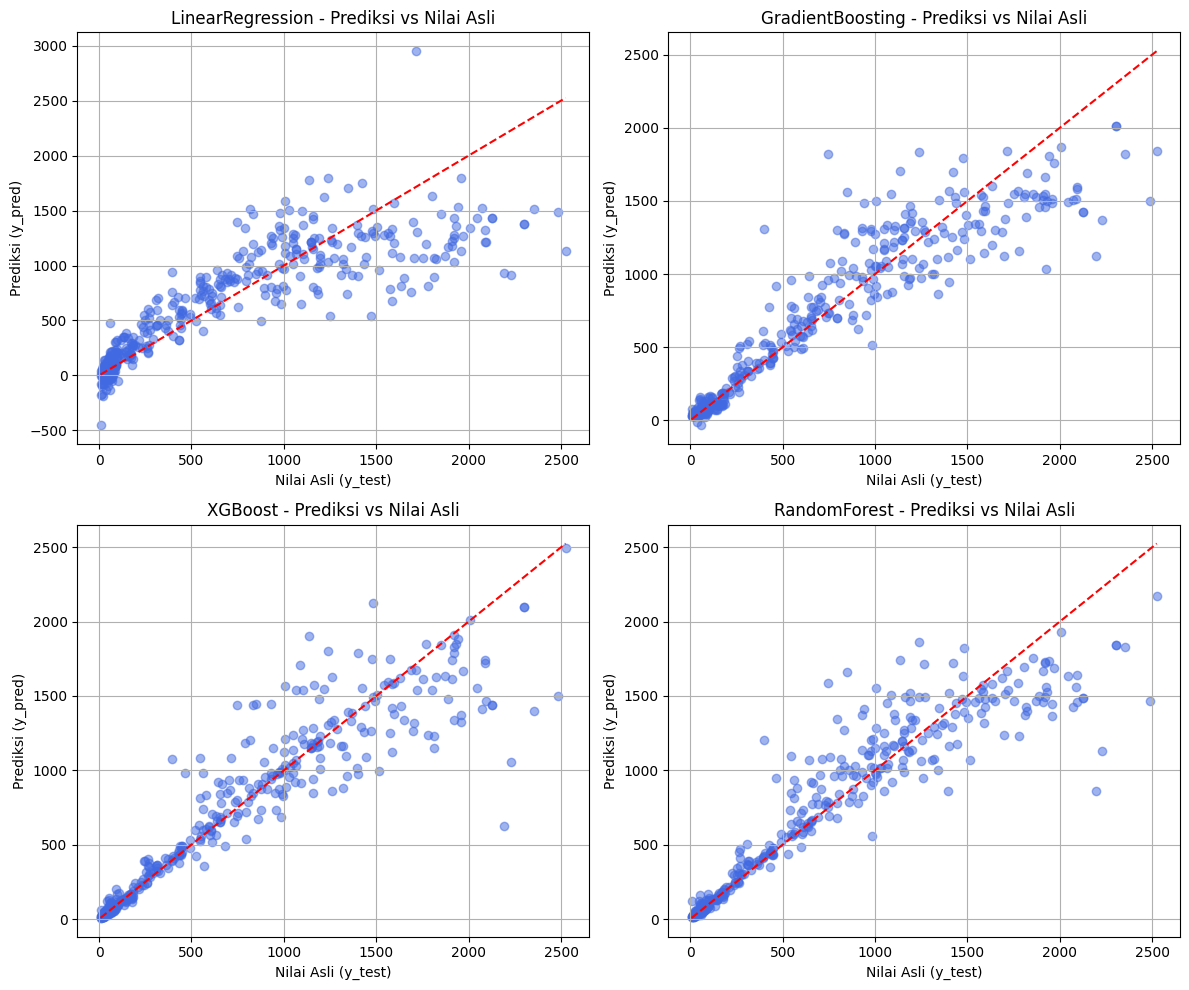

In [150]:
plt.figure(figsize=(12, 10))

# Enumerasi semua model dan prediksinya
for i, (name, model) in enumerate(models.items(), start=1):
    y_pred = model.predict(X_test)

    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.title(f'{name} - Prediksi vs Nilai Asli')
    plt.xlabel('Nilai Asli (y_test)')
    plt.ylabel('Prediksi (y_pred)')
    plt.grid(True)

plt.tight_layout()
plt.show()

✨ Interpretasi:

🔹 1. LinearRegression
Banyak prediksi menyimpang dari garis merah, terutama pada nilai CLV tinggi.

Cenderung underfitting (kurang fleksibel menangkap pola kompleks).

Beberapa prediksi negatif (di bawah 0) — ini tidak realistis untuk CLV.

🔹 2. GradientBoosting
Sebagian besar titik dekat dengan garis merah → prediksi cukup baik.

Lebih baik daripada linear regression, terutama di kisaran CLV menengah.

🔹 3. XGBoost
Titik-titik lebih padat di sekitar garis merah → prediksi lebih akurat.

Beberapa outlier pada nilai CLV tinggi, tapi secara umum stabil.

Salah satu model terbaik dalam hal presisi dan generalisasi.

🔹 4. RandomForest
Prediksi paling mendekati garis merah → akurasi sangat tinggi.

Hampir semua titik tersebar simetris dan merapat ke garis ideal.

Konsisten baik di seluruh rentang nilai → model paling akurat.

| Model                | Akurasi Visual | Catatan                                                              |
| -------------------- | -------------- | -------------------------------------------------------------------- |
| **LinearRegression** | ❌ Lemah        | Banyak deviasi dari nilai asli, underfitting, hasil negatif          |
| **GradientBoosting** | ✅ Cukup baik   | Titik lebih dekat ke garis, tapi masih ada deviasi di nilai tinggi   |
| **XGBoost**          | ✅ Lebih baik   | Titik lebih padat di sekitar garis merah, generalisasi cukup bagus   |
| **RandomForest**     | ✅✅ Terbaik     | Titik paling mendekati garis, hasil sangat stabil dan presisi tinggi |


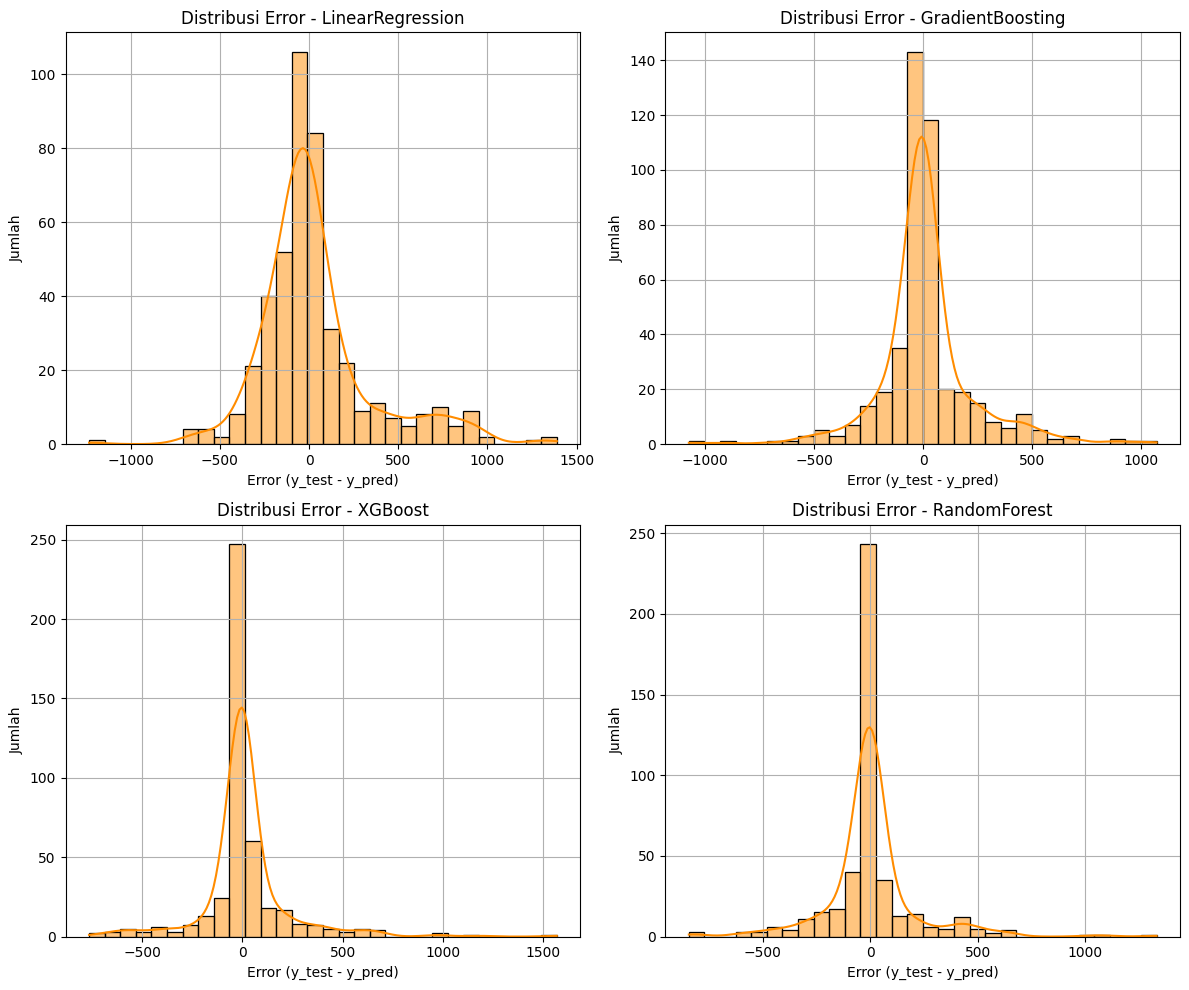

In [144]:
# === DISTRIBUSI ERROR PER MODEL ===
plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), start=1):
    y_pred = model.predict(X_test)
    error = y_test - y_pred

    plt.subplot(2, 2, i)
    sns.histplot(error, bins=30, kde=True, color='darkorange')
    plt.title(f'Distribusi Error - {name}')
    plt.xlabel('Error (y_test - y_pred)')
    plt.ylabel('Jumlah')
    plt.grid(True)

plt.tight_layout()
plt.show()

✨ Interpretasi:

🔹 1. LinearRegression
Distribusinya lebar dan rata, banyak error besar ke kiri dan kanan.

Artinya: Model cukup bias dan tidak stabil, banyak prediksi meleset jauh (under/overestimate).

Puncaknya rendah → prediksi menyebar jauh dari nilai sebenarnya.

🔹 2. GradientBoosting
Distribusinya lebih sempit dibanding linear regression.

Titik puncaknya cukup tinggi di tengah (sekitar 0) → model lebih akurat.

Masih ada outlier, tapi lebih terkendali.

🔹 3. XGBoost
Distribusi sangat sempit dan tajam di tengah.

Artinya: sebagian besar error mendekati 0 → prediksi sangat akurat.

Nyaris simetris → model minim bias.

🔹 4. RandomForest
Mirip XGBoost, distribusinya paling sempit dan tinggi di tengah.

Mayoritas prediksi sangat dekat dengan nilai asli.

Artinya: model sangat stabil dan presisi tinggi.